In [1]:
"""
This notebook plots predicted and observed tracks for the rs185220 tiQTL (Fig. 3C)
"""

'\nThis notebook plots predicted and observed tracks for the rs185220 tiQTL (Fig. 3C)\n'

In [15]:
import numpy as np
import pyfastx
import os
import h5py
import sys
sys.path.append("../../clipnet")
from utils import plot_side

In [16]:
# PRINT COMMANDS TO DOWNLOAD AND EXTRACT DATA

# Set SCRATCH to where you want to download data to
SCRATCH = "/Users/adamhe/github/scratch"

URL = "https://zenodo.org/records/10597358/files"
TAR = "example_tracks_and_deepshap.tar.gz"
print(f"wget {URL}/{TAR} -P {SCRATCH}")
print(f"tar -xvzf {SCRATCH}/{TAR}")

wget https://zenodo.org/records/10597358/files/example_tracks_and_deepshap.tar.gz -P /Users/adamhe/github/scratch
tar -xvzf /Users/adamhe/github/scratch/example_tracks_and_deepshap.tar.gz


In [17]:
# Load data

# Experimental
y = np.load(
    os.path.join(SCRATCH, "example_tracks_and_deepshap/concat_procap.npz")
)["arr_0"][:, np.r_[250:750, 1250:1750]]

# Predicted
mean_tracks = {}
for n in [5, 10, 15, 20, 30]:
    y_pred_scaled = []
    for r in range(5):
        prediction = h5py.File(
            os.path.join(SCRATCH, f"example_tracks_and_deepshap/n{n}_run{r}_fold_7_examples_prediction.h5")
        )
        tracks = prediction["track"]
        quantity = prediction["quantity"]
        y_norm = tracks / np.array(tracks).sum(axis=1, keepdims=True)
        y_pred_scaled.append(y_norm * quantity)
    y_pred = np.array(y_pred_scaled).mean(axis=0)
    mean_tracks[n] = y_pred

/var/folders/sd/3462tpx12fbfxc_f8swcwyf40000gp/T/ipykernel_1682/2951133281.py:18: RuntimeWarning: invalid value encountered in divide
  y_norm = tracks / np.array(tracks).sum(axis=1, keepdims=True)


In [18]:
# Divide individuals by genotype:

fasta = pyfastx.Fasta(os.path.join(SCRATCH, "example_tracks_and_deepshap/concat_sequence.fna.gz"))
seq_coords = [seq.name.split("_")[-1] for seq in fasta]

rs185220_coord = "chr5:56909030-56910029"
rs185220_seqs = [i for i in range(len(fasta)) if seq_coords[i] == rs185220_coord]

a_pred = {
    n: [mean_tracks[n][i, :] for i in rs185220_seqs if fasta[i].seq[500] == "A"]
    for n in mean_tracks
}
a_expt = np.mean([y[i, :] for i in rs185220_seqs if fasta[i].seq[500] == "A"], axis=0)
g_pred = {
    n: [mean_tracks[n][i, :] for i in rs185220_seqs if fasta[i].seq[500] == "G"]
    for n in mean_tracks
}
g_expt = np.mean([y[i, :] for i in rs185220_seqs if fasta[i].seq[500] == "G"], axis=0)

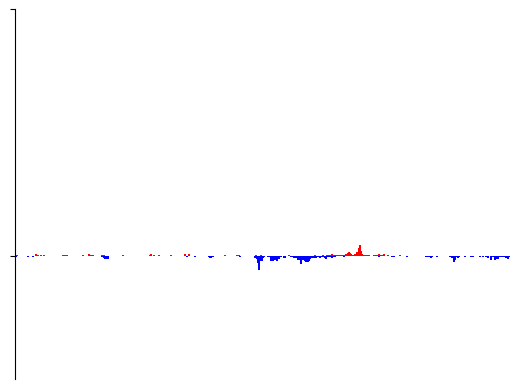

In [24]:
plot_side(a_pred[5][0], ylim=[-1.5, 3], yticks=[0, 3])#, pic_name="img/model_fold_1_rs185220A_pred.pdf")

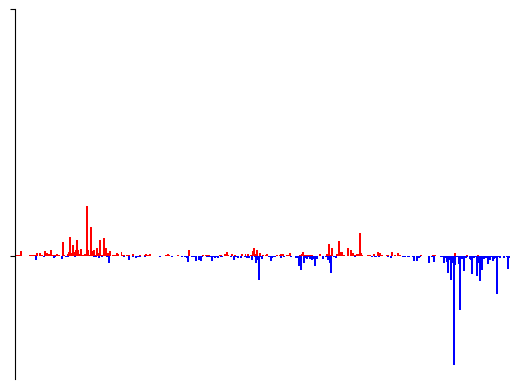

In [20]:
plot_side(a_expt, ylim=[-1.5, 3], yticks=[0, 3])#, pic_name="img/model_fold_1_rs185220A_expt.pdf")

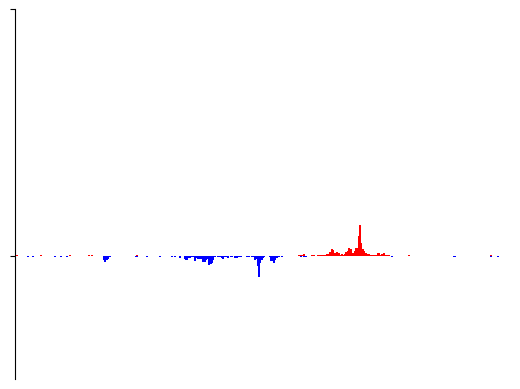

In [23]:
plot_side(g_pred[5][0], ylim=[-1.5, 3], yticks=[0, 3])#, pic_name="img/model_fold_1_rs185220G_pred.pdf")

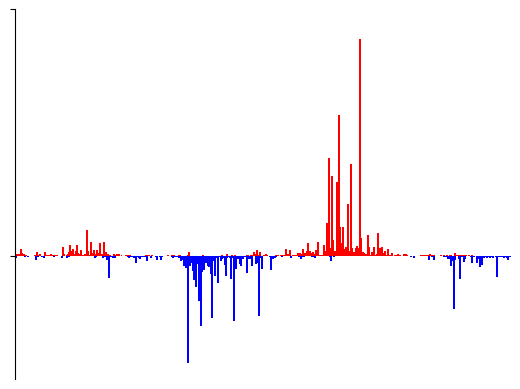

In [22]:
plot_side(g_expt, ylim=[-1.5, 3], yticks=[0, 3])#, pic_name="img/model_fold_1_rs185220G_expt.pdf")